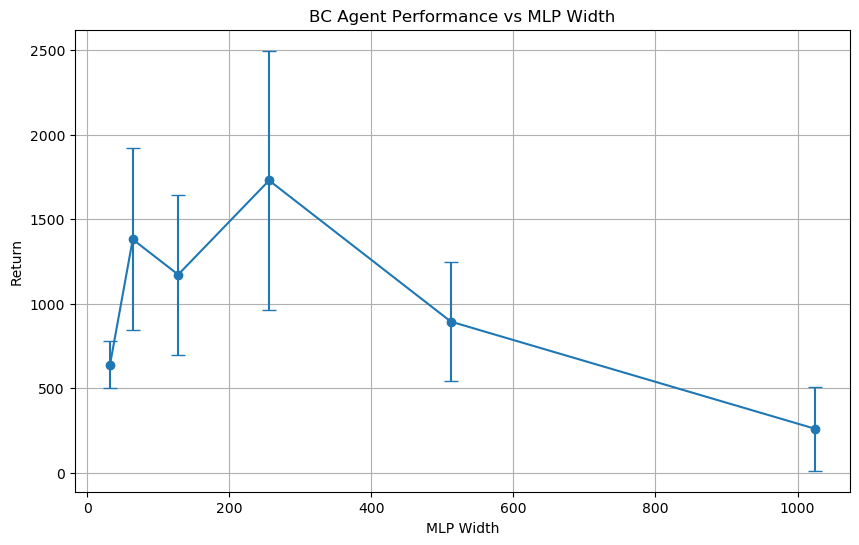

In [10]:
# experiment with one set of hyperparameters that affects the performance of the behavioral
# cloning agent, such as the amount of training steps, the amount of expert data provided, or something
# that you come up with yourself. For one of the tasks used in the previous question, show a graph of how
# the BC agent’s performance varies with the value of this hyperparameter. In this graph, report both the
# mean and standard deviation of return over at least five rollouts. In the caption for the graph, state the
# hyperparameter and a brief rationale for why you chose it.

import matplotlib.pyplot as plt

# Data
mlp_widths = [32, 64, 128, 256, 512, 1024]
average_returns = [640.289, 1381.004, 1172.567, 1729.545, 894.422, 261.832]
std_returns = [139.914, 537.480, 472.480, 767.105, 352.191, 248.994]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(mlp_widths, average_returns, yerr=std_returns, fmt='-o', capsize=5)
plt.xlabel('MLP Width')
plt.ylabel('Return')
plt.title('BC Agent Performance vs MLP Width')
plt.grid(True)
plt.savefig('bc_agent_performance_vs_mlp_width.png')

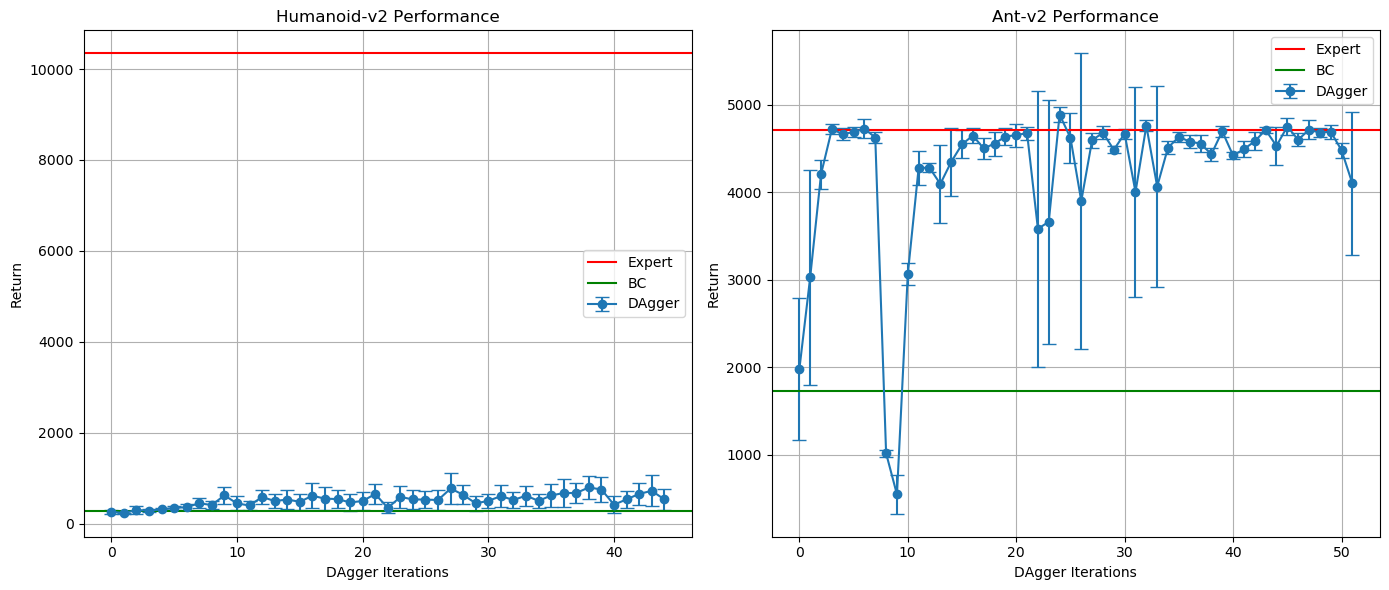

In [13]:
""" 
Report your results in the form of a learning curve, plotting the number of
DAgger iterations vs. the policy’s mean return, with error bars to show the standard deviation. Include
the performance of the expert policy and the behavioral cloning agent on the same plot (as horizontal
lines that go across the plot). In the caption, state which task you used, and any details regarding
network architecture, amount of data, etc. (as in the previous section).

Env   & \multicolumn{2}{c}{Ant-v2} & \multicolumn{2}{c}{Humanoid-v2} \\
\midrule
Metric & Mean  & Std.  & Mean  & Std. \\
Expert & 4713.653 & 12.197 & 10344.518 & 20.981 \\
BC    & 1729.545 & 767.105 &  281.326 & 15.861 \\
\bottomrule[1.0pt]

logs contain (T, 2) data, T is the number of iterations, 2 is mean and std, plot according to the data above and the loaded data for each env
"""

import numpy as np
import matplotlib.pyplot as plt

# Load logs
logs_path_humanoids = "/home/yl/course/16831-F24-HW/hw1/data/q2_dagger_humanoid_Humanoid-v2_16-09-2024_21-43-19/eval_logs.npy"
logs_path_ants = "/home/yl/course/16831-F24-HW/hw1/data/q2_dagger_ant_Ant-v2_16-09-2024_21-43-15/eval_logs.npy"

humanoid_logs = np.load(logs_path_humanoids)
ant_logs = np.load(logs_path_ants)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Humanoid-v2
iterations = np.arange(len(humanoid_logs))
humanoid_means = humanoid_logs[:, 0]
humanoid_stds = humanoid_logs[:, 1]

ax[0].errorbar(iterations, humanoid_means, yerr=humanoid_stds, fmt='-o', capsize=5, label='DAgger')
ax[0].axhline(y=10344.518, color='r', linestyle='-', label='Expert')
ax[0].axhline(y=281.326, color='g', linestyle='-', label='BC')
ax[0].set_xlabel('DAgger Iterations')
ax[0].set_ylabel('Return')
ax[0].set_title('Humanoid-v2 Performance')
ax[0].legend()
ax[0].grid(True)

# Ant-v2
iterations = np.arange(len(ant_logs))
ant_means = ant_logs[:, 0]
ant_stds = ant_logs[:, 1]

ax[1].errorbar(iterations, ant_means, yerr=ant_stds, fmt='-o', capsize=5, label='DAgger')
ax[1].axhline(y=4713.653, color='r', linestyle='-', label='Expert')
ax[1].axhline(y=1729.545, color='g', linestyle='-', label='BC')
ax[1].set_xlabel('DAgger Iterations')
ax[1].set_ylabel('Return')
ax[1].set_title('Ant-v2 Performance')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.savefig('dagger_performance.png')
